In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
train=pd.read_csv('datasets/Train_v2.csv')
test=pd.read_csv('datasets/Test_v2.csv')
submission_file=pd.read_csv('datasets/SubmissionFile.csv')
Variables=pd.read_csv('datasets//VariableDefinitions.csv')

In [74]:
Variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


### Descriptive statistics about our data

In [3]:
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [7]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


### Data Wrangling

In [75]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086

In [76]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [10]:
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [77]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [11]:
test.describe()

,year,household_size,age_of_respondent
count,10086.000000,10086.000000,10086.000000
mean,2016.975907,3.778802,38.308348
std,0.847356,2.212721,16.270053
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,20.000000,100.000000


In [11]:
train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [13]:
test.dtypes

country                   object
year                       int64
uniqueid                  object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

### Exploratory Data Analysis

#### Univariate Analysis

<AxesSubplot:title={'center':'Number of respondents with or without bank account'}, xlabel='bank_account', ylabel='count'>

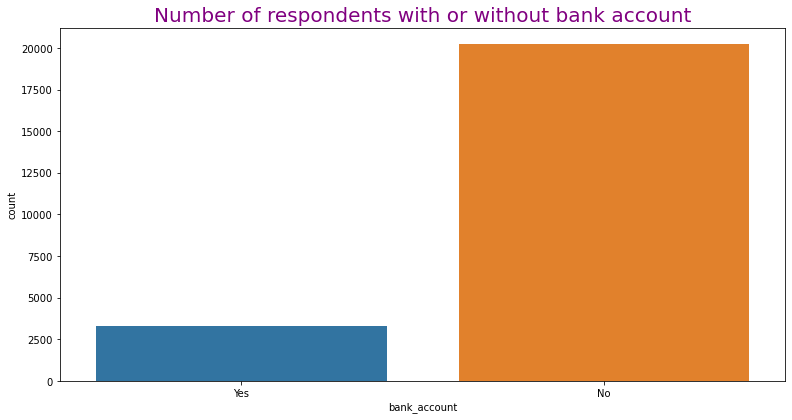

In [62]:
# Distribution of the target variable
plt.figure(figsize=(13, 6.5))
plt.title(label="Number of respondents with or without bank account",
          fontsize=20,
          color="purple")
sns.countplot(train["bank_account"])

Text(0.5, 1.0, 'Age distribution')

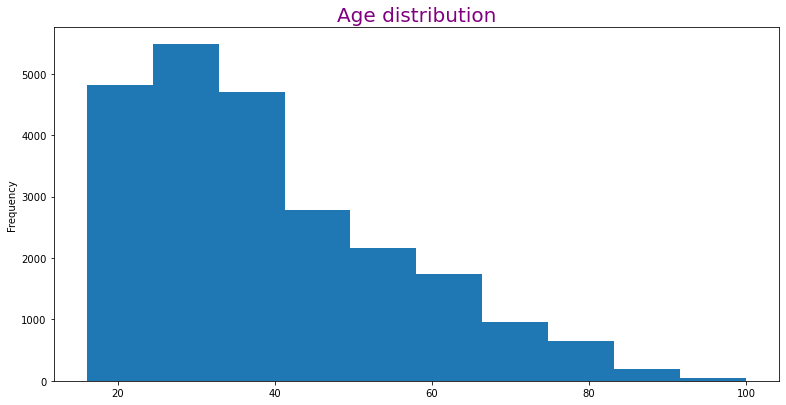

In [70]:
# age of respondent
train['age_of_respondent'].plot.hist(figsize=(13, 6.5))
plt.title(label="Age distribution",
          fontsize=20,
          color="purple")

<AxesSubplot:title={'center':' Age distribution'}, xlabel='age_of_respondent', ylabel='count'>

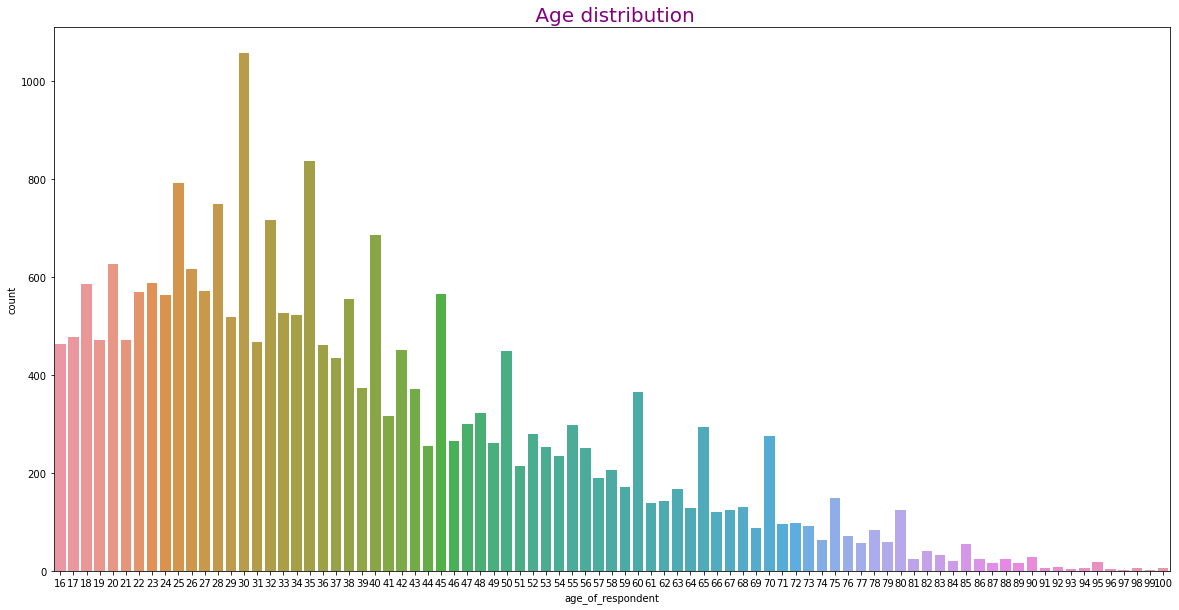

In [63]:
plt.figure(figsize=(20, 10))
plt.title(label=" Age distribution",
          fontsize=20,
          color="purple")
sns.countplot(x='age_of_respondent', data=train)

<AxesSubplot:title={'center':"Respondents' countries"}, xlabel='country', ylabel='count'>

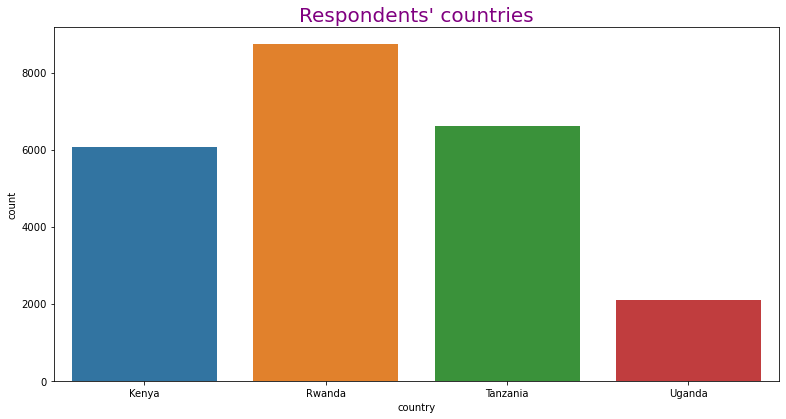

In [78]:
plt.figure(figsize=(13, 6.5))
plt.title(label="Respondents' countries",
          fontsize=20,
          color="purple")
sns.countplot(data=train, x="country")

Text(0.5, 1.0, 'Residential area')

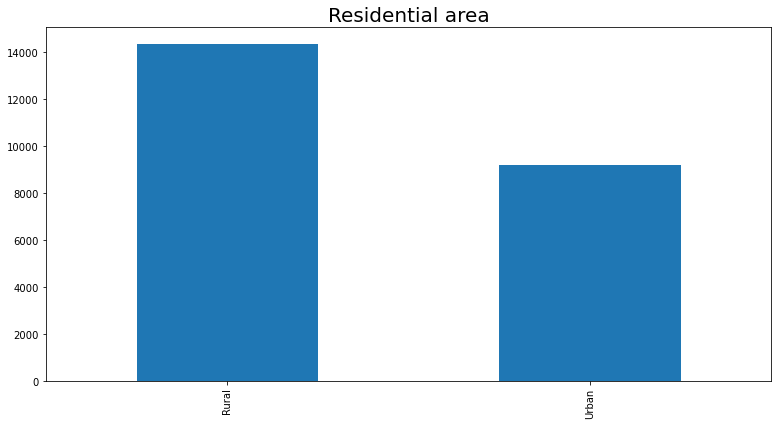

In [14]:
# location type
train['location_type'].value_counts().plot(kind='bar',figsize=[13,6.5])
plt.title(label="Residential area",
          fontsize=0,
          color="black")

<AxesSubplot:title={'center':"Respondents' cellphone accessability"}, xlabel='cellphone_access', ylabel='count'>

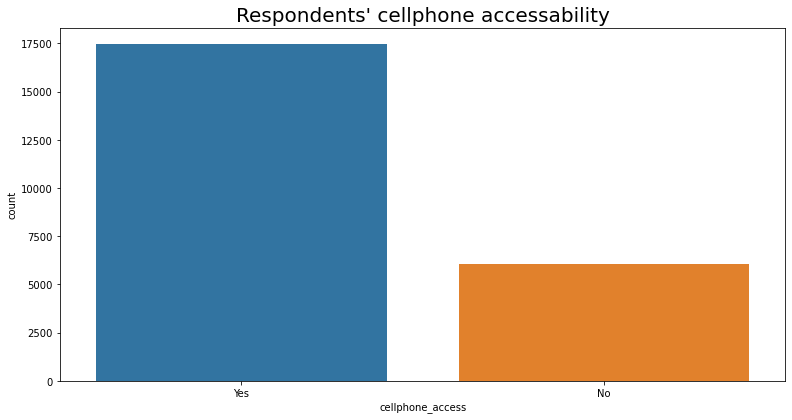

In [18]:
plt.figure(figsize=(13, 6.5))
plt.title(label="Respondents' cellphone accessability",
          fontsize=20,
          color="black")
sns.countplot(train['cellphone_access'])

<AxesSubplot:title={'center':"Respondents' household size"}, xlabel='household_size', ylabel='count'>

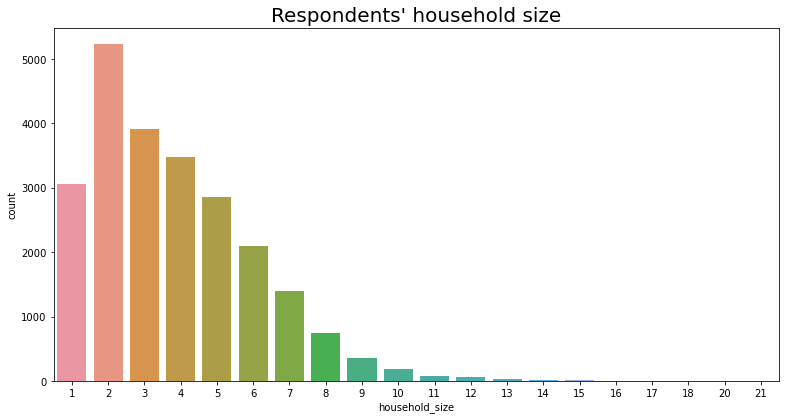

In [17]:
plt.figure(figsize=(13, 6.5))
plt.title(label="Respondents' household size",
          fontsize=20,
          color="black")
sns.countplot(x='household_size', data=train)

<AxesSubplot:title={'center':' Gender Distribution'}, xlabel='count', ylabel='gender_of_respondent'>

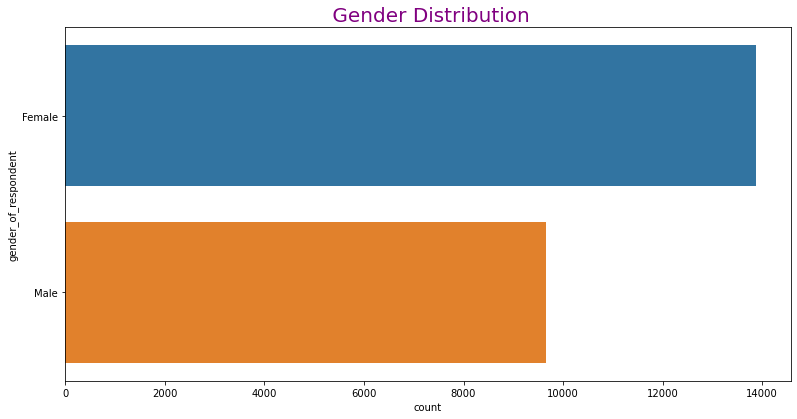

In [19]:
plt.figure(figsize=(13, 6.5))
plt.title(label=" Gender Distribution",
          fontsize=20,
          color="purple")
sns.countplot(y=train['gender_of_respondent'])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

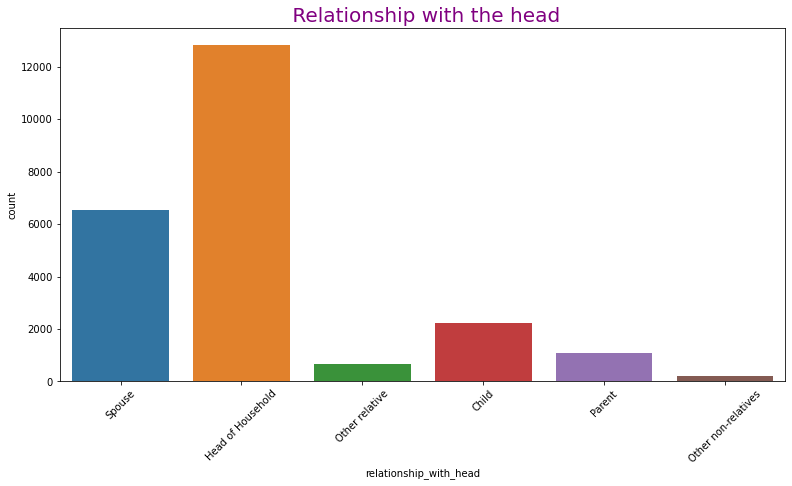

In [20]:
plt.figure(figsize=(13, 6.5))
sns.countplot(train['relationship_with_head'])
plt.title(label=" Relationship with the head",
          fontsize=20,
          color="purple")
plt.xticks(rotation=45)

<AxesSubplot:title={'center':' Marital status'}, xlabel='marital_status', ylabel='count'>

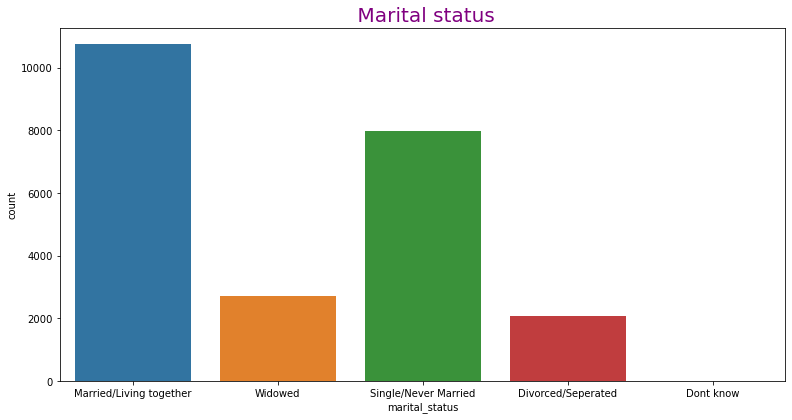

In [21]:
plt.figure(figsize=(13, 6.5))
plt.title(label=" Marital status",
          fontsize=20,
          color="purple")
sns.countplot(train['marital_status'])

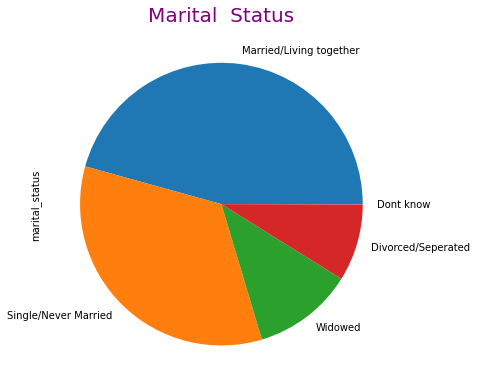

In [22]:
plt.figure(figsize=(13, 6.5))
plt.title(label="Marital  Status",
          fontsize=20,
          color="purple")
train.marital_status.value_counts(normalize=True).plot.pie()
plt.show()

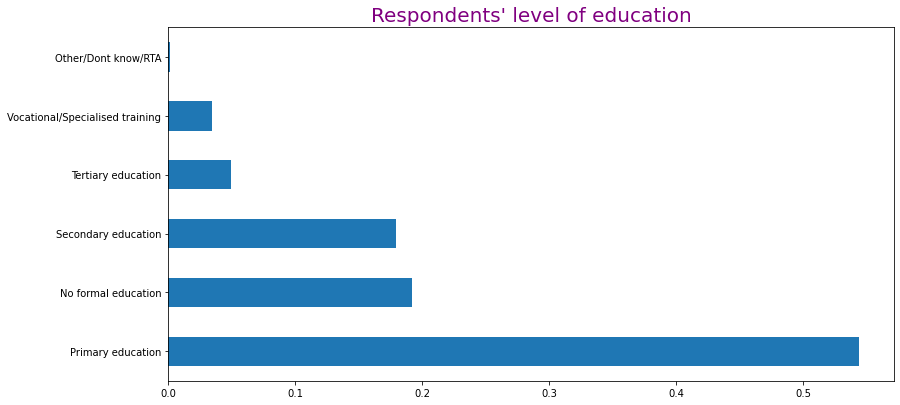

In [24]:
plt.figure(figsize=(13, 6.5))
plt.title(label="Respondents' level of education",
          fontsize=20,
          color="purple")
train.education_level.value_counts(normalize=True).plot.barh()
plt.show()

<AxesSubplot:title={'center':"Respondents' job type"}, xlabel='count', ylabel='job_type'>

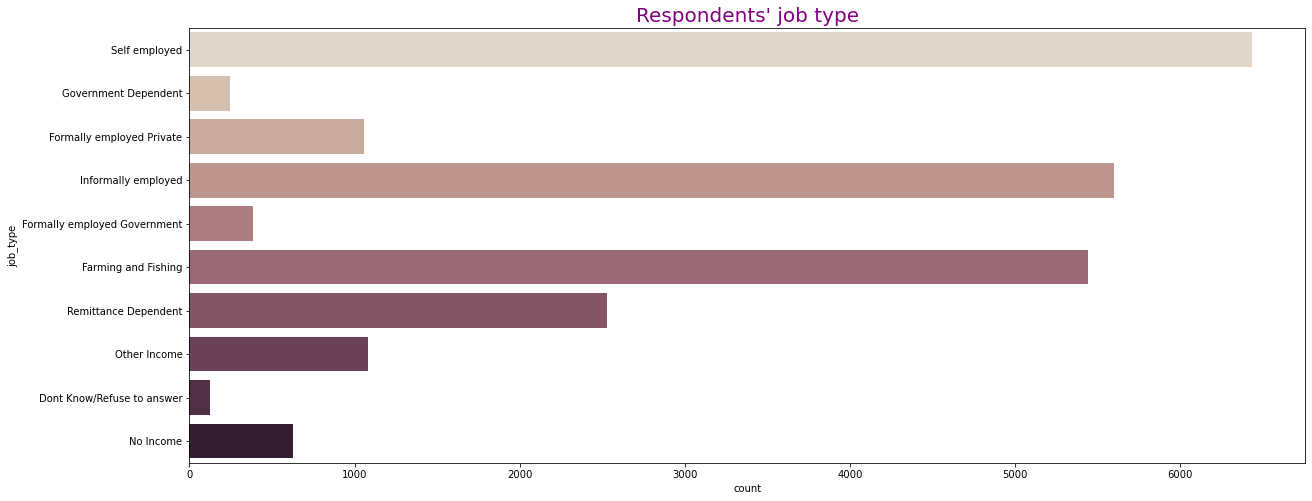

In [26]:
plt.figure(figsize=(20, 8))
plt.title(label="Respondents' job type",
          fontsize=20,
          color="purple")
sns.countplot(y = train['job_type'], palette='ch:.25')

#### Bivariate Analysis

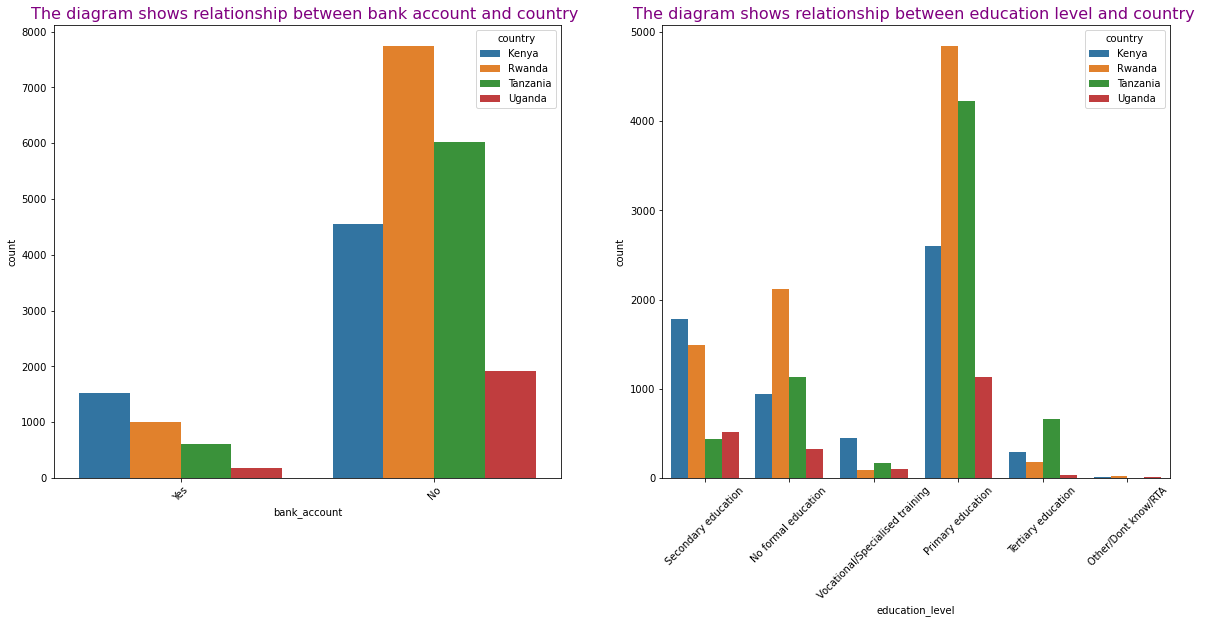

In [6]:
features = ["bank_account", "education_level"]
fig=plt.subplots(figsize=(20, 25))
for index,feature in enumerate(features):
    plt.title(label="The diagram shows relationship between bank account and country ",
          fontsize=16,
          color="purple")
    plt.subplot(2,2,index+1)
    plt.title(label="The diagram shows relationship between education level and country ",
          fontsize=16,
          color="purple")
    plt.xticks(rotation=45)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(data=train, x=feature, hue="country")

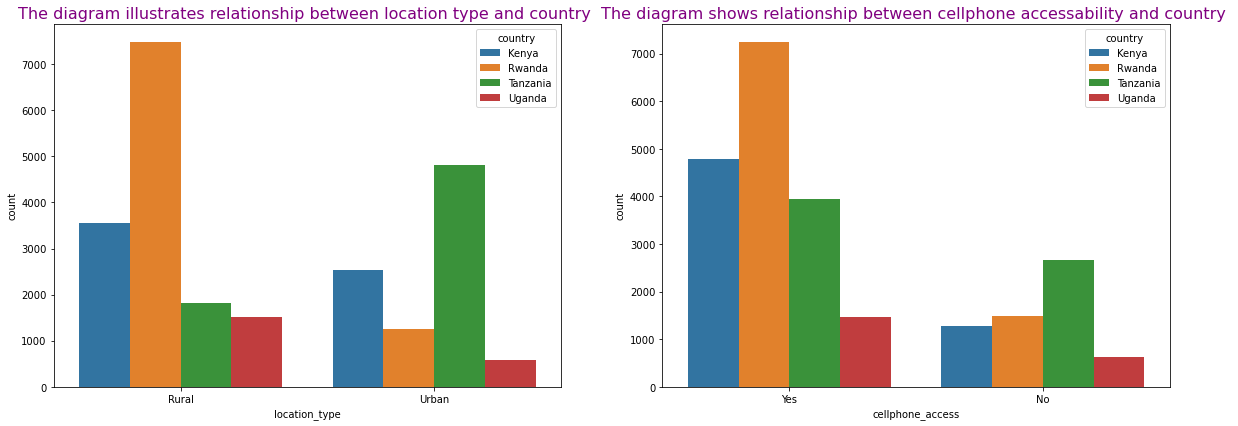

In [38]:
features2 = ["location_type", "cellphone_access"]
fig=plt.subplots(figsize=(20, 20))

for index,feature in enumerate(features2):
    plt.title(label="The diagram illustrates relationship between location type and country ",
          fontsize=16,
          color="purple")
    plt.subplot(2,2,index+1)
    plt.title(label="The diagram shows relationship between cellphone accessabil and country ",
          fontsize=16,
          color="purple")
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(data=train, x=feature, hue="country")

Text(0.5, 1.0, 'The diagram shows relationship between job type and bank account ')

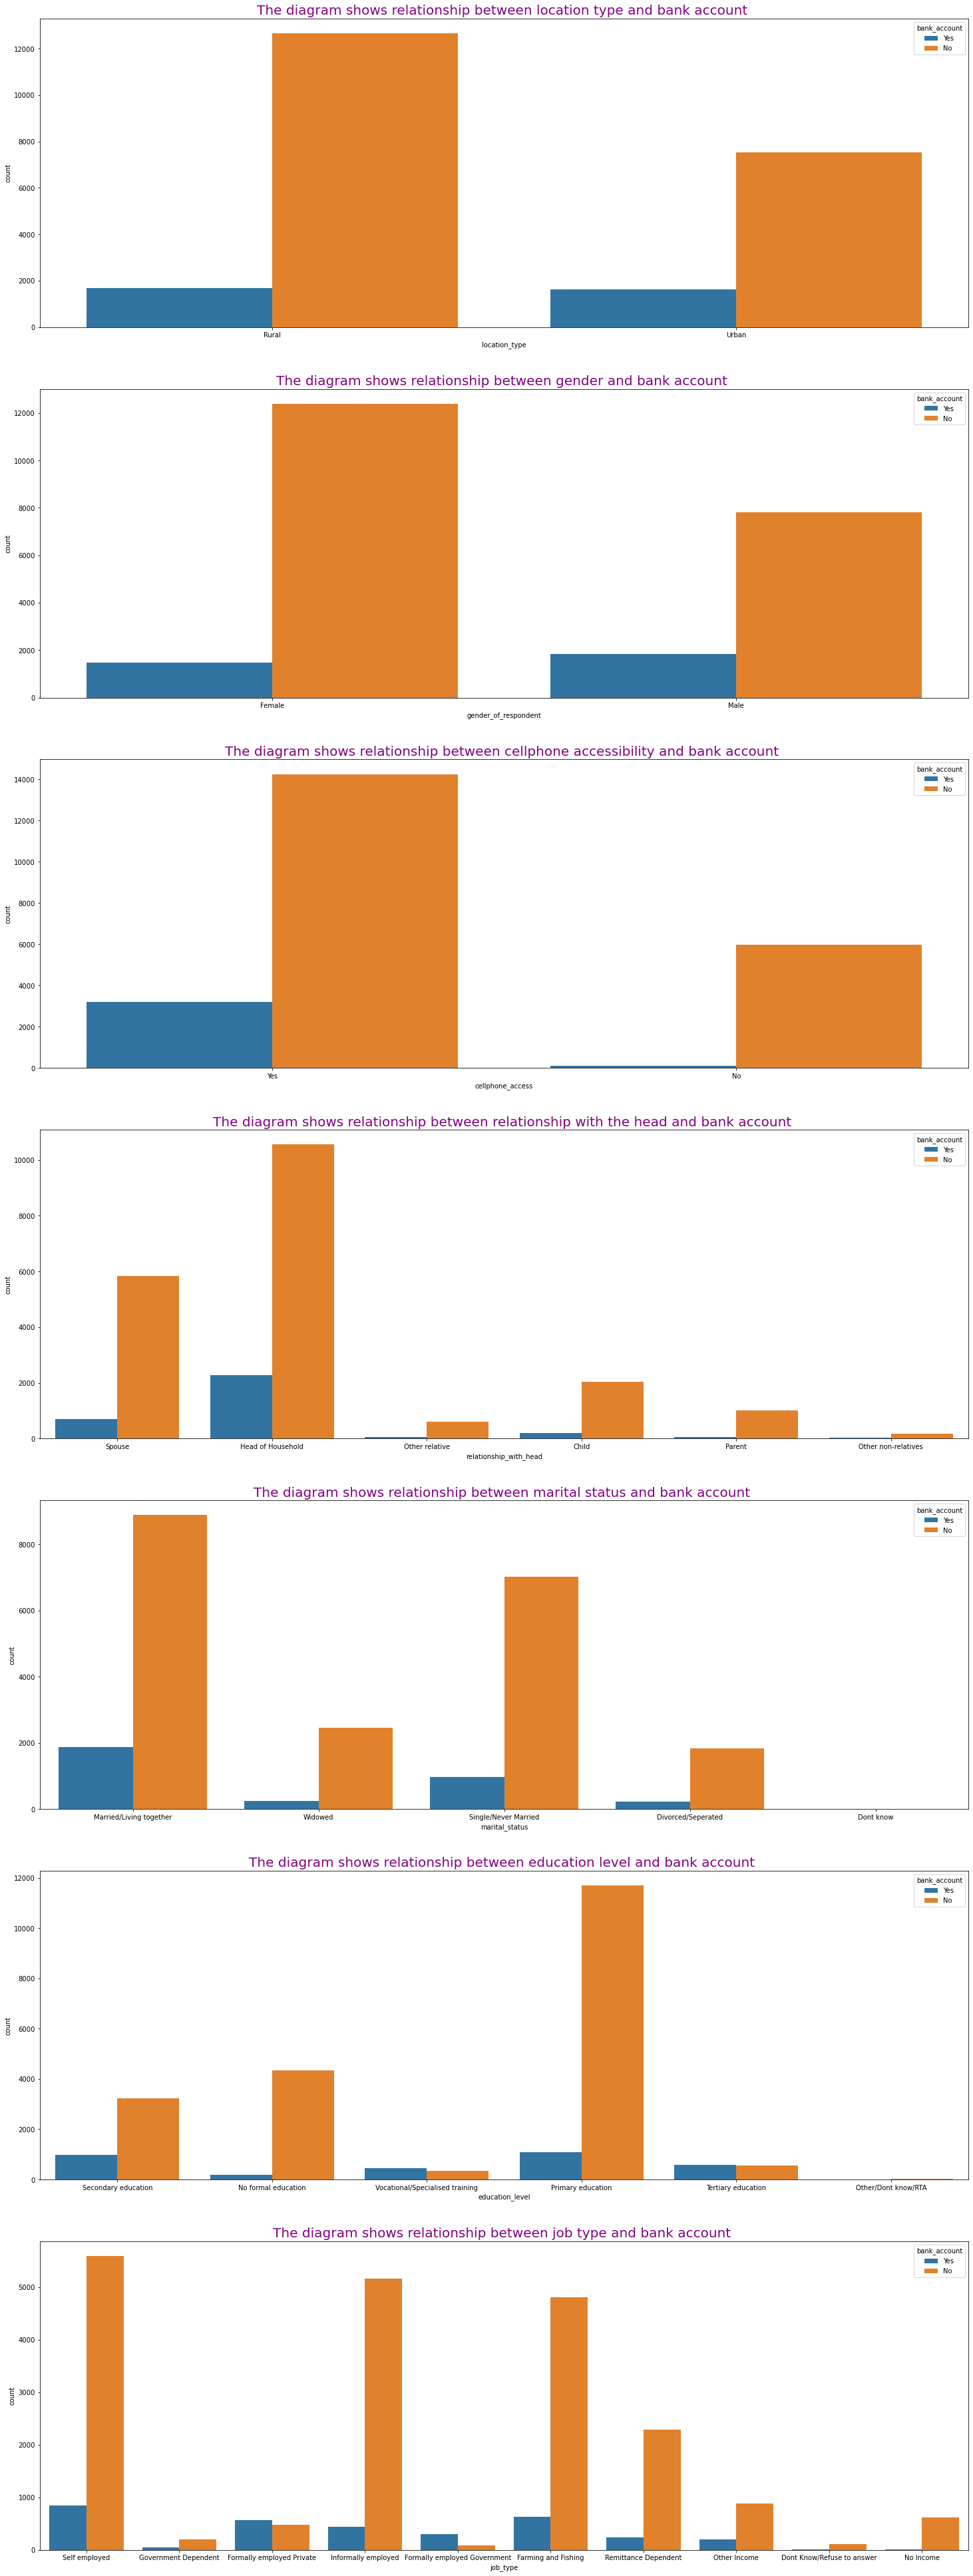

In [46]:
f, axes = plt.subplots(7, 1, figsize=[25, 70])
sns.countplot('location_type', hue= 'bank_account', data=train, ax=axes[0]).set_title(label="The diagram shows relationship between location type and bank account ",
          fontsize=20,
          color="purple")
sns.countplot('gender_of_respondent', hue= 'bank_account', data=train, ax=axes[1]).set_title(label="The diagram shows relationship between gender and bank account ",
          fontsize=20,
          color="purple")
sns.countplot('cellphone_access', hue= 'bank_account', data=train, ax=axes[2]).set_title(label="The diagram shows relationship between cellphone accessibility and bank account ",
          fontsize=20,
          color="purple")
sns.countplot('relationship_with_head', hue= 'bank_account', data=train, ax=axes[3]).set_title(label="The diagram shows relationship between relationship with the head and bank account ",
          fontsize=20,
          color="purple")
sns.countplot('marital_status', hue= 'bank_account', data=train, ax=axes[4]).set_title(label="The diagram shows relationship between marital status and bank account ",
          fontsize=20,
          color="purple")
sns.countplot('education_level', hue= 'bank_account', data=train, ax=axes[5]).set_title(label="The diagram shows relationship between education level and bank account ",
          fontsize=20,
          color="purple")
sns.countplot('job_type', hue= 'bank_account', data=train, ax=axes[6]).set_title(label="The diagram shows relationship between job type and bank account ",
          fontsize=20,
          color="purple")

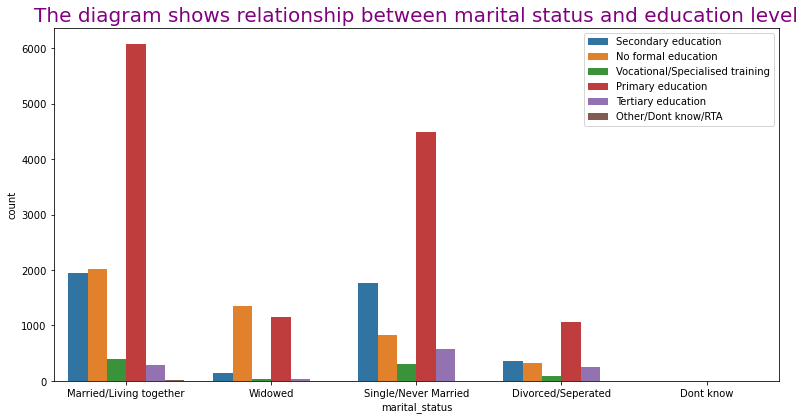

In [47]:
plt.figure(figsize=(13, 6.5))
sns.countplot(data=train,x="marital_status",hue="education_level").set_title(label="The diagram shows relationship between marital status and education level",
          fontsize=20,
          color="purple")
plt.legend(loc='upper right')

Text(0.5, 1.0, 'The graph illustrates the number of respondents by their respective age and country. ')

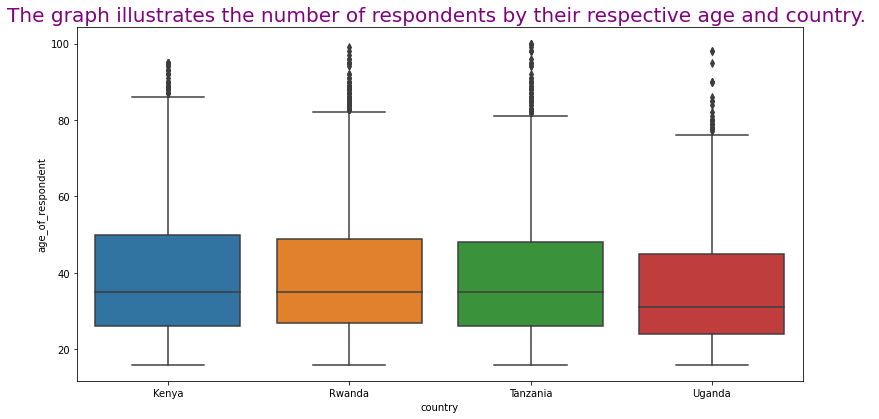

In [49]:
plt.figure(figsize=(13, 6.5))
sns.boxplot(data=train,x="country",y="age_of_respondent").set_title(label="The graph illustrates the number of respondents by their respective age and country. ",
          fontsize=20,
          color="purple")

<AxesSubplot:xlabel='bank_account', ylabel='household_size'>

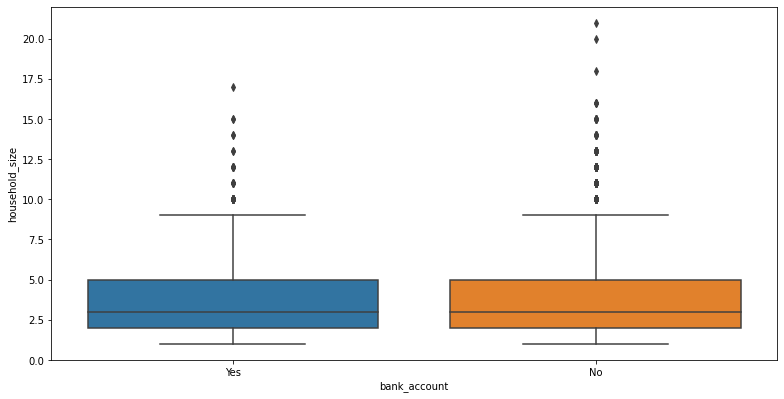

In [32]:
plt.figure(figsize=(13, 6.5))
sns.boxplot(data=train,y='household_size',x='bank_account')

<AxesSubplot:title={'center':'Violin Plot  shows the average age of the respondents with bank account'}, xlabel='bank_account', ylabel='age_of_respondent'>

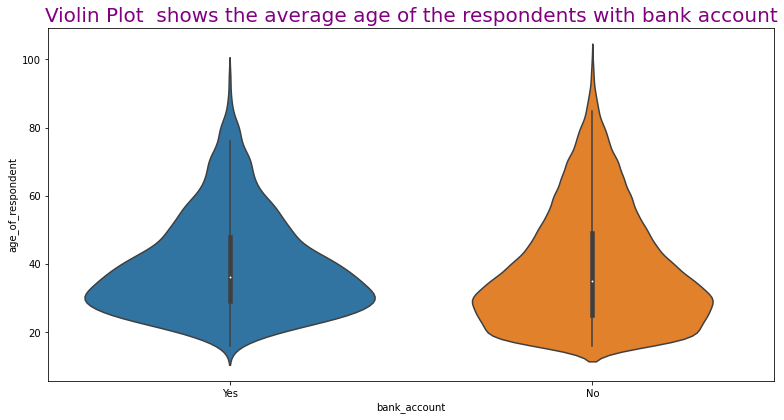

In [72]:
plt.figure(figsize=(13, 6.5))
plt.title(label="Violin Plot  shows the average age of the respondents with bank account",
          fontsize=20,
          color="purple")
sns.violinplot(x='bank_account', y='age_of_respondent', data = train)

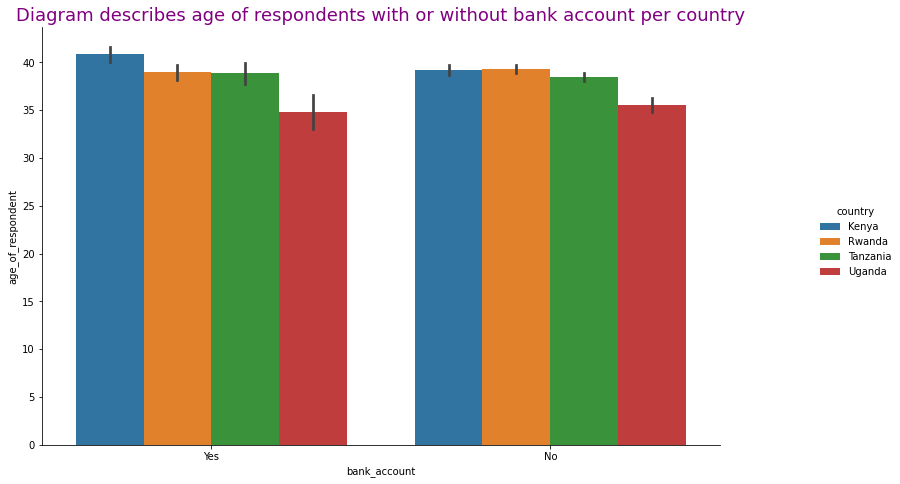

In [50]:
g = sns.catplot(x='bank_account', y='age_of_respondent', hue='country', kind='bar', data=train)
g.fig.set_figwidth(13)
plt.title(label="Diagram describes age of respondents with or without bank account per country",
          fontsize=18,
          color="purple")
g.fig.set_figheight(6.5)

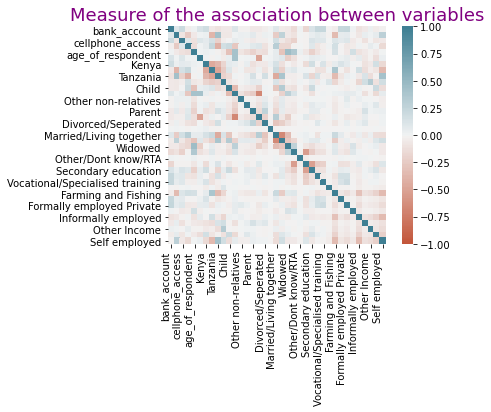

In [111]:

corr = train.corr()
plt.title(label="Measure of the association between variables",
          fontsize=18,
          color="purple")
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

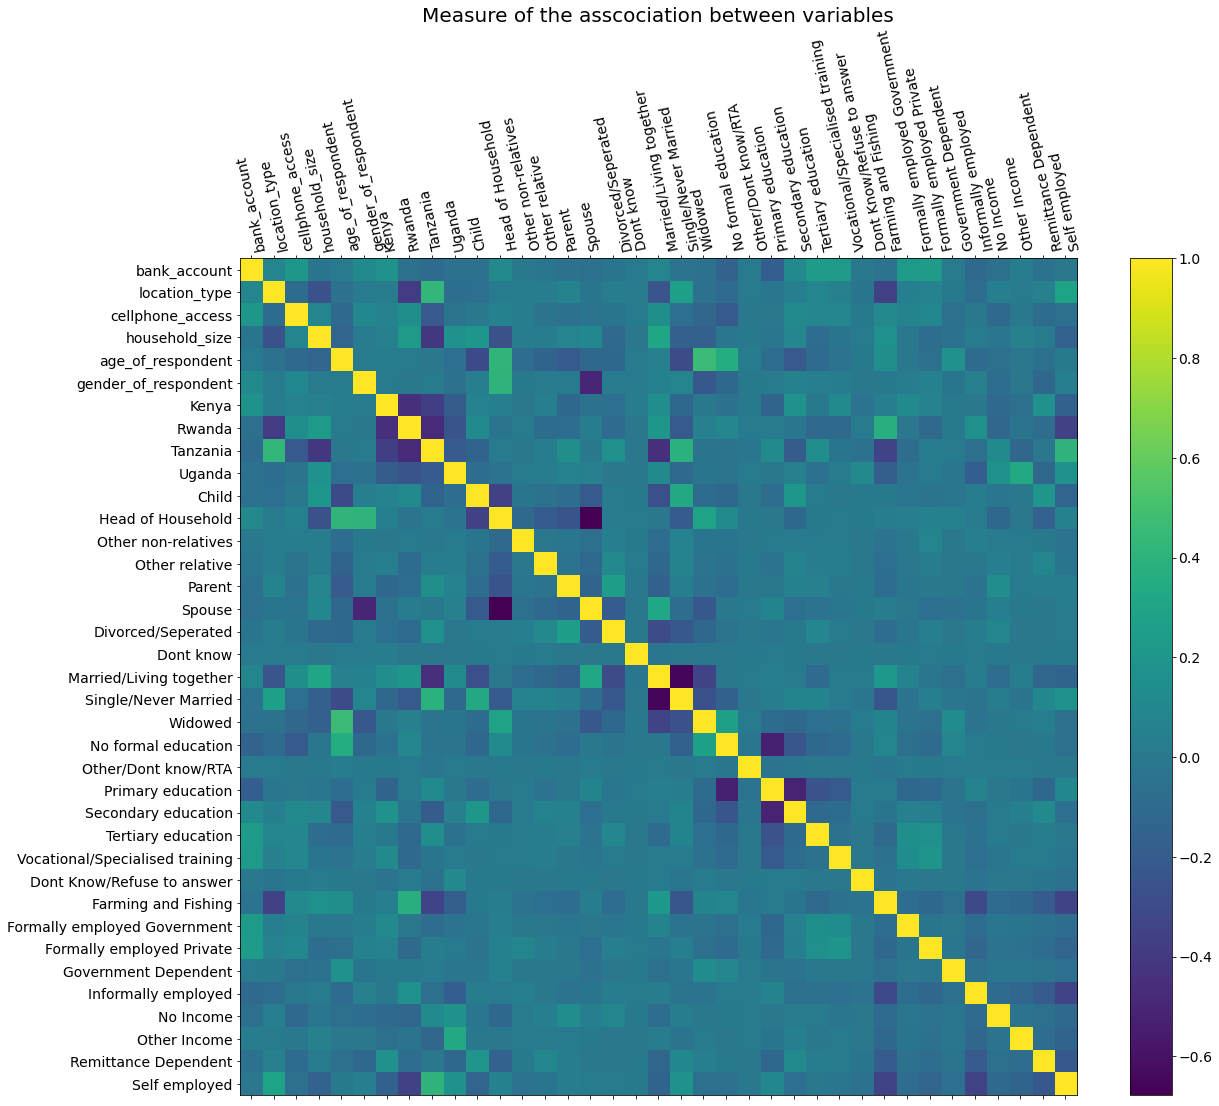

In [98]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=f.number)
plt.xticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14, rotation=102)
plt.yticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Measure of the asscociation between variables', fontsize=);

### Data Preprocessing and Training Development

In [79]:
country_dummies_train = pd.get_dummies(train['country'])
train = train.join(country_dummies_train)
relationship_dummies = pd.get_dummies(train['relationship_with_head'])
train = train.join(relationship_dummies)
marital_dummies = pd.get_dummies(train['marital_status'])
train = train.join(marital_dummies)
ed_dummies = pd.get_dummies(train['education_level'])
train = train.join(ed_dummies)
job_dummies = pd.get_dummies(train['job_type'])
train = train.join(job_dummies)

# test data
country_dummies_test = pd.get_dummies(test['country'])
test = test.join(country_dummies_test)
relationship_dummies2 = pd.get_dummies(test['relationship_with_head'])
test = test.join(relationship_dummies2)
marital_dummies2 = pd.get_dummies(test['marital_status'])
test = test.join(marital_dummies2)
ed_dummies2 = pd.get_dummies(test['education_level'])
test = test.join(ed_dummies2)
job_dummies2 = pd.get_dummies(test['job_type'])
test = test.join(job_dummies2)

train.drop(['relationship_with_head', 'marital_status', 'education_level', 'job_type', 'country',
                   'year', 'uniqueid'], axis=1,inplace=True)

test.drop(['relationship_with_head', 'marital_status', 'education_level', 'job_type', 'country',
                  'year','uniqueid'], axis=1, inplace=True)

In [37]:
train.head()

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,Kenya,Rwanda,Tanzania,Uganda,...,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,Yes,Rural,Yes,3,24,Female,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,No,Rural,No,5,70,Female,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Yes,Urban,Yes,5,26,Male,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,No,Rural,Yes,5,34,Female,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,No,Urban,No,8,26,Male,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [80]:
# Labelncoder conversion
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le=LabelEncoder()
ms=MinMaxScaler()

# Convert target label to numerical Data
train['bank_account'] = le.fit_transform(train['bank_account'])

train['location_type'] = le.fit_transform(train['location_type'])
train['cellphone_access'] = le.fit_transform(train['cellphone_access'])
train['gender_of_respondent'] = le.fit_transform(train['gender_of_respondent'])


test['location_type'] = le.fit_transform(test['location_type'])
test['cellphone_access'] = le.fit_transform(test['cellphone_access'])
test['gender_of_respondent'] = le.fit_transform(test['gender_of_respondent'])


train.head()

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,Kenya,Rwanda,Tanzania,Uganda,...,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,1,0,1,3,24,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,5,70,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,5,26,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,5,34,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,8,26,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
#Separate training features from target
X = train.drop(['bank_account'], axis=1)
y = train['bank_account']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=100)

In [83]:
X = ms.fit_transform(X)
test = ms.fit_transform(test)

### Modelling

In [43]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [44]:
ypred=logmodel.predict(X_test)

In [45]:
# evaluating performance : Accuracy, Precision, Recall
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, ypred))
print("Precision: ", metrics.precision_score(y_test, ypred))
print("Recall: ", metrics.recall_score(y_test, ypred))
print("F1 Score: ", metrics.f1_score(y_test, ypred))

Accuracy:  0.8756021535845848
Precision:  0.7021276595744681
Recall:  0.3089887640449438
F1 Score:  0.4291287386215864


In [46]:
sub1 = logmodel.predict(test)

In [47]:
submission_file.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,0.0
2,uniqueid_6714 x Kenya,1.0
3,uniqueid_8103 x Kenya,1.0
4,uniqueid_8657 x Kenya,1.0


In [48]:
submission_file['bank_account'] = sub1

In [49]:
submission_file.to_csv("sub2.csv", index= False)

In [50]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB() 
classifier.fit(X_train, y_train)

GaussianNB()

In [51]:
ypred2=classifier.predict(X_test)

In [52]:
print("Accuracy: ", metrics.accuracy_score(y_test, ypred2))
print("Precision: ", metrics.precision_score(y_test, ypred2))
print("Recall: ", metrics.recall_score(y_test, ypred2))
print("F1 Score: ", metrics.f1_score(y_test, ypred2))

Accuracy:  0.848682346273732
Precision:  0.5
Recall:  0.48314606741573035
F1 Score:  0.4914285714285714


In [53]:
sub3 = classifier.predict(test)

In [54]:
submission_file['bank_account'] = sub3
submission_file.to_csv("sub3.csv", index= False)

In [55]:
from sklearn.svm import SVC
svc = SVC(gamma='auto', kernel='rbf', C=5)

svc.fit(X_train, y_train)
ypred3 = svc.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, ypred3))
print("Precision: ", metrics.precision_score(y_test, ypred3))
print("Recall: ", metrics.recall_score(y_test, ypred3))
print("F1 Score: ", metrics.f1_score(y_test, ypred3))

Accuracy:  0.8787191839047889
Precision:  0.7789473684210526
Recall:  0.27715355805243447
F1 Score:  0.4088397790055249


In [56]:
sub4 = svc.predict(test)
submission_file['bank_account'] = sub4
submission_file.to_csv("sub4.csv", index= False)

In [104]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

ypred4 = dt.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, ypred4))
print("Precision: ", metrics.precision_score(y_test, ypred4))
print("Recall: ", metrics.recall_score(y_test, ypred4))
print("F1 Score: ", metrics.f1_score(y_test, ypred4))

NameError: name 'metrics' is not defined

In [103]:
sub5 = dt.predict(test)
submission_file['bank_account'] = sub5
submission_file.to_csv("sub5.csv", index= False)

NameError: name 'dt' is not defined

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

ypred5 = rf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, ypred5))
print("Precision: ", metrics.precision_score(y_test, ypred5))
print("Recall: ", metrics.recall_score(y_test, ypred5))
print("F1 Score: ", metrics.f1_score(y_test, ypred5))

Accuracy:  0.8583168036270898
Precision:  0.5454545454545454
Recall:  0.38202247191011235
F1 Score:  0.4493392070484581


In [63]:
sub6 = rf.predict(test)
submission_file['bank_account'] = sub6
submission_file.to_csv("sub6.csv", index= False)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

ypred6 = knn.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, ypred6))
print("Precision: ", metrics.precision_score(y_test, ypred6))
print("Recall: ", metrics.recall_score(y_test, ypred6))
print("F1 Score: ", metrics.f1_score(y_test, ypred6))

Accuracy:  0.8594502691980731
Precision:  0.5871559633027523
Recall:  0.2397003745318352
F1 Score:  0.3404255319148936


In [69]:
sub7 = knn.predict(test)
submission_file['bank_account'] = sub7
submission_file.to_csv("sub7.csv", index= False)